### 1. Candidate Expectations
Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

### 2. Importing Necessary Libraries

Here we will be importing the necessary libraries for data analysis and data cleaning and for importing the dataset in dataframe format.This includes the padas, numpy and visualization libraries like matplotlib and seaborn.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### 3. Loading the Data

Next step is to import the dataset we are going to analyse to Dataframe format.

In [2]:
fraud_df=pd.read_csv(r"D:\datas\insaid\Fraud.csv")
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### 4. Data Dictionary
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### 5. Data analysis and Cleaning

This is the next basic nature of the data.We will be looking the feature variables,target variables.Further we will be looking data set in details for the shape,data types ,presence of null values and distribution of data points using describe option.It will give mean,standard deviation ,percentile distribution,total count of data

In [3]:
fraud_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
fraud_df.shape

(6362620, 11)

In [5]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# to check the null values in the dataset
fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

What are the different unique mode of Transaction?And the respective distribution among the whole transaction.

In [8]:
fraud_df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
fraud_df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

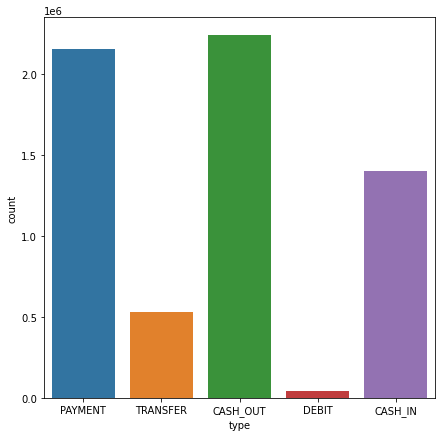

In [10]:
plt.figure(figsize=(7,7))
sn.countplot(fraud_df['type'])

Calculating the count of fraud and non-fraud transactions give better 

In [11]:
fraud_df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

Text(0.5, 1.0, 'Nonfraud and Fraud count')

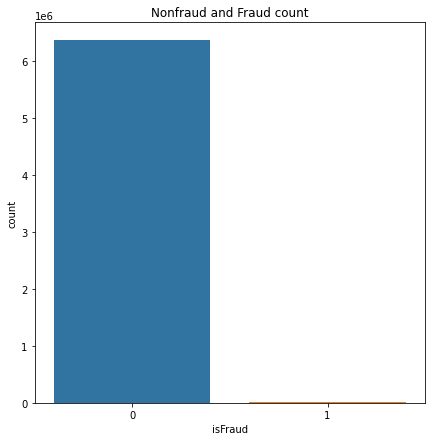

In [12]:
plt.figure(figsize=(7,7))
sn.countplot(fraud_df['isFraud'])
plt.title('Nonfraud and Fraud count')

In [13]:
fraud_df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

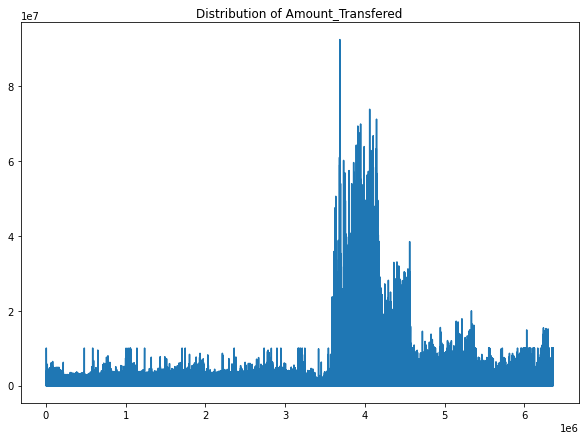

In [14]:
#Lets see the distribution of the amount transfered in a transaction
fraud_df['amount'].plot(figsize = (10, 7))
plt.title("Distribution of Amount_Transfered")
plt.show()

The amount distribution plot shows abnormal peak values of transaction amount.Normal scenario it wont be erratic,but since we are creating a classifier model here we need to consider these sort of ouliers in the data set which can disrupt the model.

In [15]:
fraud_df.step.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Text(0.5, 1.0, 'Distribution of Time')

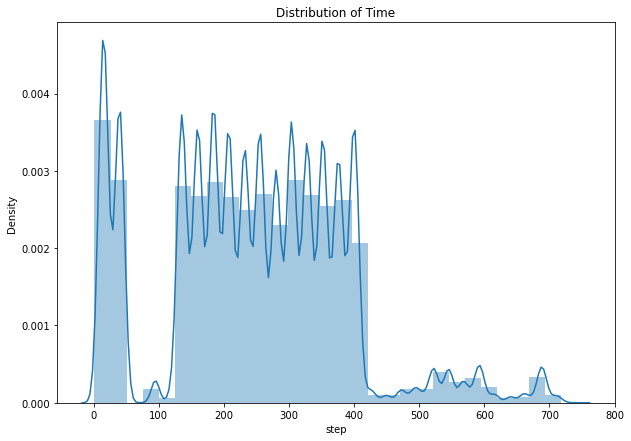

In [16]:
plt.figure(figsize=(10,7))
sn.distplot(fraud_df['step'], bins = 30)
plt.title('Distribution of Time')

Time analysis show that the transaction with time greater that 400 steps are declining rapidly,whereas most of the transactions are happening in the time range 100 to 400 hours.

<AxesSubplot:>

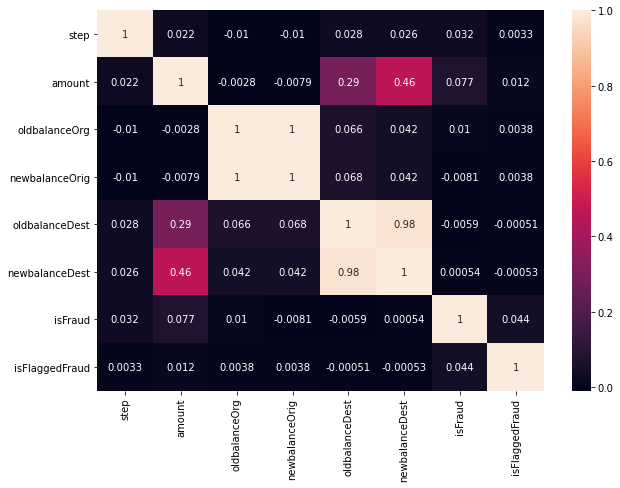

In [17]:
plt.figure(figsize=(10,7))
sn.heatmap(fraud_df.corr(),annot=True)

By analysing the correlation matrix we can identify features that are closely correlated among the feature variables and the target variable.This will help us to eliminate features which are less relavent in model building.

### 6. Data Preprocessing

#### Outlier Removing

In [18]:
fraud_df['z_score']=(fraud_df.amount-fraud_df.amount.mean())/fraud_df.amount.std()
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-0.281560
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-0.294767
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-0.297555
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-0.297555
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-0.278532


In [19]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.270436e-14
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.000000e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.978545e-01
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.756812e-01
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,-1.738653e-01
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,4.779197e-02
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.527936e+02


In [20]:
fraud_df=fraud_df[~(fraud_df['z_score']>150)]
fraud_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,-0.281560
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,-0.294767
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,-0.297555
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,-0.297555
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,-0.278532
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.264665
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,10.153952
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,10.153952
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1.109765


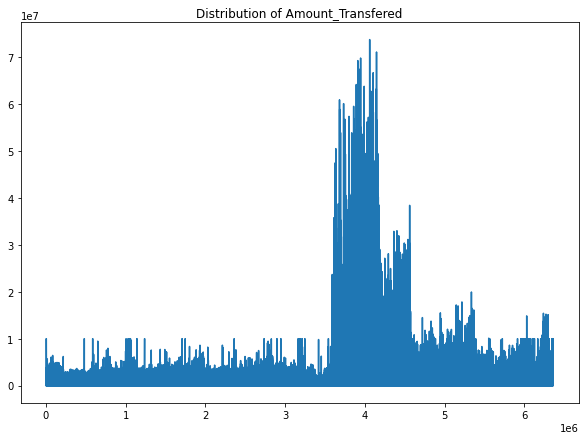

In [21]:
fraud_df['amount'].plot(figsize = (10, 7))
plt.title("Distribution of Amount_Transfered")
plt.show()

#### Feature Engineering

Since the nameOrig, nameDest are text data they are not determining whether the transaction is fraud or not.Along with that oldbalanceDest,newbalanceDest are more corellated to the amount feature we will also eliminate then for model buildig.so we are eliminating those columns using drop function.

In [22]:
fraud_df_1=fraud_df.drop(['z_score','nameOrig','nameDest','oldbalanceDest','newbalanceDest'],axis='columns')
fraud_df_1

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0,0
2,1,TRANSFER,181.00,181.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0,0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,1,0


Here our purpose is to detect whether the transaction is fraud ot not.so our target variable is 'isFraud' and remaining variable accounts for the input variables.
So the goal is to build a classifier that tells if a transaction is a fraud or not


In [23]:
x=fraud_df_1.drop('isFraud',axis='columns')
y=fraud_df_1['isFraud']

Since model cannot process in data in string format we will be using label encoder from scikit learn library. 

In [24]:
from sklearn.preprocessing import LabelEncoder
le_type=LabelEncoder()
x['type']=le_type.fit_transform(x['type'])

In [25]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0
1,1,3,1864.28,21249.00,19384.72,0
2,1,4,181.00,181.00,0.00,0
3,1,1,181.00,181.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0
...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0
6362616,743,4,6311409.28,6311409.28,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,0
6362618,743,4,850002.52,850002.52,0.00,0


In [26]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362619, dtype: int64

### 7. Split Data
Now we will be splitting the data into test and train data set for finding the accuracy of the predicted model in the later stage.We will be using a test size ratio of 0.3 in this scenario.we will explore the sixe of train and test data set.

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [28]:
x_train.shape

(4453833, 6)

In [29]:
x_test.shape

(1908786, 6)

### 8. Modeling

In this  module I will be building different classifier models and is fitting them appropriately with training data set.After building the model ,I will be predicting the output feature for the given test data.and also predict the score of model and compare which model is more appropriate.I will be  introducing 
   #### Decision tree classifier
   #### Randonforest Classifier
   #### Gaussian Naive Bayes Classifier
   #### Logistic Regression

#### a. Decision tree classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
fraud_or_not=DecisionTreeClassifier()
fraud_or_not.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
fraud_or_not.score(x_train,y_train)

1.0

In [32]:
y_predicted=fraud_or_not.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
fraud_or_not.score(x_test,y_predicted)

1.0

In [34]:
fraud_or_not.score(x_test,y_test)

0.9996180818593599

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[1906015,     336],
       [    393,    2042]], dtype=int64)

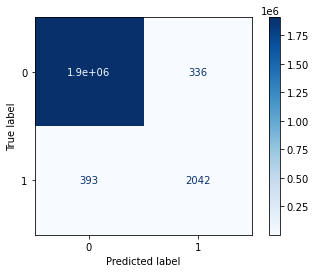

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(fraud_or_not,x_test,y_test,cmap=plt.cm.Blues)

#### b. Randonforest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
fraud_or_not_forest=RandomForestClassifier(n_estimators=10)
fraud_or_not_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
fraud_or_not_forest.score(x_train,y_train)

0.9999622796813441

In [40]:
fraud_or_not_forest.score(x_test,y_test)

0.9996123190341925

In [41]:
y_predicted_forest=fraud_or_not_forest.predict(x_test)
y_predicted_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
fraud_or_not_forest.score(x_test,y_predicted_forest)

1.0

In [43]:
from sklearn.metrics import confusion_matrix
cm_forest=confusion_matrix(y_test,y_predicted_forest)
cm_forest

array([[1906222,     129],
       [    611,    1824]], dtype=int64)

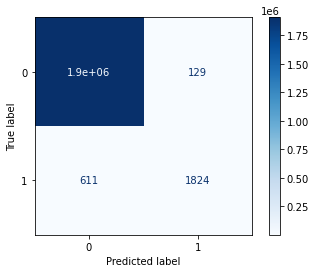

In [44]:
plot_confusion_matrix(fraud_or_not_forest,x_test,y_test,cmap=plt.cm.Blues)

#### c. Gaussian Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
fraud_or_not_NB=GaussianNB()

In [46]:
fraud_or_not_NB.fit(x_train,y_train)

GaussianNB()

In [47]:
y_predicted_NB=fraud_or_not_NB.predict(x_test)

In [48]:
fraud_or_not_NB.score(x_test,y_predicted_NB)

1.0

In [49]:
fraud_or_not_NB.score(x_test,y_test)

0.9945525585372064

In [50]:
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test,y_predicted_NB)
cm_NB

array([[1897936,    8415],
       [   1983,     452]], dtype=int64)

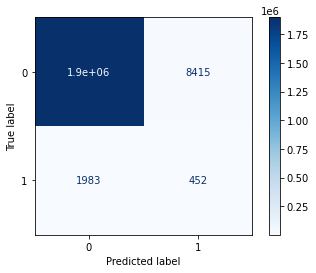

In [51]:
plot_confusion_matrix(fraud_or_not_NB,x_test,y_test,cmap=plt.cm.Blues)

#### d. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
fraud_or_not_l=LogisticRegression()

In [53]:
fraud_or_not_l.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_predicted_l=fraud_or_not_NB.predict(x_test)

In [55]:
fraud_or_not_l.score(x_test,y_predicted_l)

0.9952545754212363

In [56]:
fraud_or_not_l.score(x_test,y_test)

0.9990989037010959

In [57]:
from sklearn.metrics import confusion_matrix
cm_l=confusion_matrix(y_test,y_predicted_l)
cm_l

array([[1897936,    8415],
       [   1983,     452]], dtype=int64)

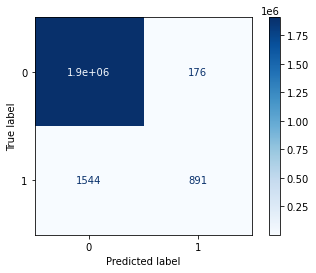

In [58]:
plot_confusion_matrix(fraud_or_not_l,x_test,y_test,cmap=plt.cm.Blues)

From these modelling and analysis of each model 